In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imageio import imread
import glob
from IPython.display import clear_output
import os  # 匯入os模組
import sys # 匯入sys模組
import pyodm # 匯入pyodm模組
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
def calculate_global_color_histogram(image):
    # 將圖像轉換為HSV色彩空間
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    # 計算直方圖
    hist = cv2.calcHist([hsv_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    # 正規化直方圖
    hist = cv2.normalize(hist, hist).flatten()
    return hist

labels = []
features0=[]
#for i in range(len(features1)):
with open('train.txt', 'r') as file:
    for line in file:
        image_file_name, label = line.strip().split(' ')
        image = Image.open(image_file_name)
        image_data_0 = np.array(image)
        labels_0=labels.append(label)
        image_data_0=cv2.cvtColor(image_data_0, cv2.COLOR_RGB2BGR)
        hist = calculate_global_color_histogram(image_data_0)
        features0.append(hist)
features0 = np.array(features0)
labels_0 = np.array(labels)
print(features0)
print(features0.shape)
print(labels_0.shape)

[[0.08661325 0.03387291 0.01317771 ... 0.         0.         0.        ]
 [0.02643868 0.12184548 0.10981804 ... 0.         0.         0.        ]
 [0.01820493 0.02306348 0.00778539 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.00059613 ... 0.         0.         0.        ]
 [0.02573715 0.00413633 0.00166602 ... 0.         0.         0.        ]
 [0.00248319 0.01532307 0.04009436 ... 0.         0.         0.        ]]
(63325, 512)
(63325,)


In [3]:
labels = []
features1=[]
#for i in range(len(features1)):
with open('test.txt', 'r') as file:
    for line in file:
        image_file_name, label = line.strip().split(' ')
        image = Image.open(image_file_name)
        image_data_1 = np.array(image)
        labels_1=labels.append(label)
        
        image_data_1=cv2.cvtColor(image_data_1, cv2.COLOR_RGB2BGR)
        hist = calculate_global_color_histogram(image_data_1)
        features1.append(hist)
features1 = np.array(features1)
labels_1=np.array(labels)
print(features1)
print(features1.shape)
print(labels_1.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.23347905 0.00023636 0.         ... 0.         0.         0.        ]
 [0.23229899 0.09332479 0.0519429  ... 0.         0.         0.        ]
 ...
 [0.05101004 0.00850167 0.00297922 ... 0.         0.         0.        ]
 [0.00382916 0.00296625 0.00334377 ... 0.         0.         0.        ]
 [0.01941418 0.1143352  0.16475995 ... 0.         0.         0.        ]]
(450, 512)
(450,)


In [4]:
labels = []
features2=[]
#for i in range(len(features1)):
with open('val.txt', 'r') as file:
    for line in file:
        image_file_name, label = line.strip().split(' ')
        image = Image.open(image_file_name)
        image_data_2 = np.array(image)
        labels_2=labels.append(label)
        image_data_2=cv2.cvtColor(image_data_2, cv2.COLOR_RGB2BGR)
        hist = calculate_global_color_histogram(image_data_2)
        features2.append(hist)
features2 = np.array(features2)
labels_2 = np.array(labels)
print(features2)
print(features2.shape)
print(labels_2.shape)

[[1.1031483e-01 1.4827338e-01 1.9299753e-02 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.4235074e-04 1.1126400e-02 3.4805660e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.4327262e-04 1.5751902e-02 2.1529626e-02 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [5.2330565e-02 6.1886171e-03 3.7937881e-03 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 3.8903716e-04 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [7.6251788e-05 3.8125894e-05 1.1437768e-04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]
(450, 512)
(450,)


In [5]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1, gamma='auto')
model.fit(features0, labels_0)

SVC(C=1, gamma='auto', kernel='linear')

In [6]:
train_predictions = model.predict(features0)
# 計算訓練準確度
train_accuracy_1 = accuracy_score(labels_0, train_predictions) 
print('Training Accuracy:', train_accuracy_1)
y_pred = model.predict(features1)
# 計算分類的準確率
accuracy_1 = accuracy_score(labels_1, y_pred)
print('Accuracy:', accuracy_1)
val_preds = model.predict(features2)
val_acc_1 = accuracy_score(labels_2, val_preds)
print("Validation Accuracy:", val_acc_1)

Training Accuracy: 0.1421239636794315
Accuracy: 0.10222222222222223
Validation Accuracy: 0.13111111111111112


In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf.fit(features0, labels_0)
accuracy_2 = rf.score(features1,labels_1)
print("Accuracy:", accuracy_2)
val_preds = rf.predict(features2)
val_acc_2 = accuracy_score(labels_2, val_preds)
print("Validation Accuracy:", val_acc_2)

Accuracy: 0.14222222222222222
Validation Accuracy: 0.1288888888888889


In [60]:
import lightgbm as lgb
model = lgb.LGBMClassifier(is_unbalance=True)
model.fit(features0,labels_0)
train_predictions = model.predict(features0)

train_accuracy_3 = np.mean(train_predictions == labels_0)
print('Training Accuracy:', train_accuracy_3)
pred=model.predict(features1)
accuracy_3=accuracy_score(labels_1, pred)
print("Accuracy:", accuracy_3)
val_preds = model.predict(features2)
val_acc_3 = accuracy_score(labels_2, val_preds)
print("Validation Accuracy:", val_acc_3)

Training Accuracy: 0.972238452427951
Accuracy: 0.18666666666666668
Validation Accuracy: 0.20444444444444446


In [45]:
from sklearn import ensemble, preprocessing, metrics
boost = ensemble.AdaBoostClassifier(n_estimators = 100)
boost_fit = boost.fit(features0, labels_0)

# 預測
test_y_predicted = boost.predict(features1)

# 績效
accuracy_4 = metrics.accuracy_score(labels_1, test_y_predicted)
print(accuracy_4)
val_preds = boost.predict(features2)
val_acc_4 = accuracy_score(labels_2, val_preds)
print("Validation Accuracy:", val_acc_4)

0.08444444444444445
Validation Accuracy: 0.10888888888888888


In [59]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(iterations=100, depth=5)
model.fit(features0, labels_0)
train_predictions = model.predict(features0)
train_accuracy_5 = np.mean(train_predictions == labels_0) 
print('Training Accuracy:', train_accuracy_5)
y_pred = model.predict(features1)
accuracy_5=accuracy_score(labels_1, y_pred)
print(accuracy_5)
val_preds = model.predict(features2)
val_acc_5 = accuracy_score(labels_2, val_preds)
print("Validation Accuracy:", val_acc_5)

Learning rate set to 0.5
0:	learn: 3.7628454	total: 3.62s	remaining: 5m 58s
1:	learn: 3.6957501	total: 7.34s	remaining: 5m 59s
2:	learn: 3.6268815	total: 11.2s	remaining: 6m 2s
3:	learn: 3.5748805	total: 15.1s	remaining: 6m 3s
4:	learn: 3.5245864	total: 19.1s	remaining: 6m 2s
5:	learn: 3.4928999	total: 22.9s	remaining: 5m 58s
6:	learn: 3.4633670	total: 26.6s	remaining: 5m 53s
7:	learn: 3.4317445	total: 30.3s	remaining: 5m 48s
8:	learn: 3.4047738	total: 34.1s	remaining: 5m 45s
9:	learn: 3.3849323	total: 37.9s	remaining: 5m 40s
10:	learn: 3.3613707	total: 41.6s	remaining: 5m 36s
11:	learn: 3.3439557	total: 45.4s	remaining: 5m 32s
12:	learn: 3.3250520	total: 49.1s	remaining: 5m 28s
13:	learn: 3.3025861	total: 52.9s	remaining: 5m 25s
14:	learn: 3.2843043	total: 56.7s	remaining: 5m 21s
15:	learn: 3.2731835	total: 1m	remaining: 5m 18s
16:	learn: 3.2592078	total: 1m 4s	remaining: 5m 14s
17:	learn: 3.2479119	total: 1m 8s	remaining: 5m 11s
18:	learn: 3.2313536	total: 1m 12s	remaining: 5m 7s
19:

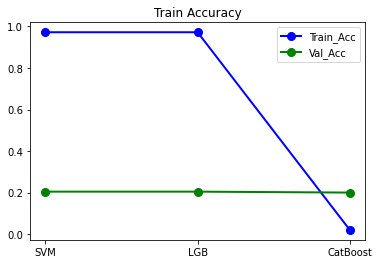

In [79]:
R=np.array([train_accuracy_1,train_accuracy_3,train_accuracy_5])
plt.title('Train Accuracy')
plt.plot(labels, R, color='blue', linestyle="-", linewidth="2", markersize="16", marker=".",label="Train_Acc")
plt.plot(labels, M, color='green', linestyle="-", linewidth="2", markersize="16", marker=".",label="Val_Acc")

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


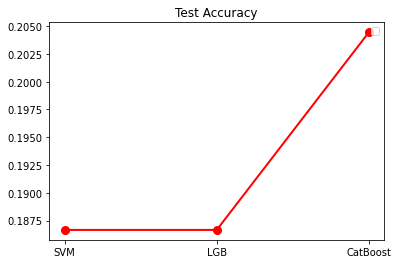

In [72]:
J=np.array([accuracy_1,accuracy_3,accuracy_5])
plt.plot(labels, J, color='red', linestyle="-", linewidth="2", markersize="16", marker=".")

plt.title('Test Accuracy')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


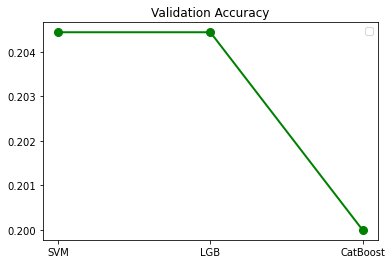

In [75]:
M=np.array([val_acc_1,val_acc_3,val_acc_5])
plt.plot(labels, M, color='green', linestyle="-", linewidth="2", markersize="16", marker=".")
plt.title('Validation Accuracy')
plt.legend()
plt.show()